In [4]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
from prosit_t.eval import prosit_transformer_eval
from prosit_t.wandb_agent.train_utils import get_proteometools_data
import wandb
from prosit_t.models import PrositTransformerV2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from dlomix.data import IntensityDataset
from dlomix.models import PrositIntensityPredictor
from prosit_t.eval import ce_calibration

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [4]:
project_name = "transforming-prosit-first-pool"
run = wandb.init(project=project_name)

wandb: Currently logged in as: mamisashvili-lizi (prosit-compms). Use `wandb login --relogin` to force relogin


In [5]:
artifact_path = "prosit-compms/transforming-prosit-first-pool/model-hardy-pine-74:v144"
transformer = PrositTransformerV2(seq_length=30,embedding_output_dim=64,num_heads=16,
        num_transformers=6, dense_dim_factor=4)
transformer = prosit_transformer_eval.load_model(run,artifact_path,transformer)

2023-11-30 01:06:25.603075: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 01:06:25.913798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 39096 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:21:00.0, compute capability: 8.6
wandb:   5 of 5 files downloaded.  
2023-11-30 01:06:27.084696: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ./artifacts/model-hardy-pine-74:v144: FAILED_PRECONDITION: artifacts/model-hardy-pine-74:v144; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [6]:
# baseline_path = "prosit-compms/transforming-prosit-first-pool/model-dauntless-violet-90:v62"
baseline_path = "prosit-compms/transforming-prosit-first-pool/model-classic-star-15:v45"
baseline = PrositIntensityPredictor(
    seq_length=30,
    embedding_output_dim=16,
    recurrent_layers_sizes=(256, 512)
)
baseline = prosit_transformer_eval.load_model(run,baseline_path,baseline)

wandb:   4 of 4 files downloaded.  
2023-11-30 01:06:28.619445: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ./artifacts/model-classic-star-15:v45: FAILED_PRECONDITION: artifacts/model-classic-star-15:v45; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


In [7]:
data_config = {
    "dataset": "proteometools",
    "data_source": {
        "train": "/cmnfs/proj/prosit/Transformer/first_pool_train.parquet",
        "val": "/cmnfs/proj/prosit/Transformer/first_pool_test.parquet",
    },
    "fragmentation": "HCD",
    "batch_size": 1024,
    "seq_length": 30,
}

In [8]:
_, val_ds = get_proteometools_data(data_config)

In [9]:
val_df = ce_calibration.dataset_to_df(val_ds)

In [10]:
val_df = ce_calibration.get_orig_ce_column(val_df, data_config["data_source"]["val"])

In [11]:
transformer_ce_cal = ce_calibration.get_ce_calibration_df(val_df, transformer, data_config["batch_size"])

2023-11-30 01:09:09.253478: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA A40" frequency: 1740 num_cores: 84 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 40995258368 bandwidth: 696096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2023-11-30 01:09:09.393681: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 1s 822ms/step


2023-11-30 01:09:24.840039: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA A40" frequency: 1740 num_cores: 84 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "11020" } environment { key: "cudnn" value: "8100" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 6291456 shared_memory_size_per_multiprocessor: 102400 memory_size: 40995258368 bandwidth: 696096000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 115ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 146ms/step


In [ ]:
baseline_ce_cal = ce_calibration.get_ce_calibration_df(val_df, baseline, data_config["batch_size"])

1/1 [==============================] - 0s 60ms/step


2023-11-30 02:21:43.276064: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8906


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

In [ ]:
transformer_ce_cal.to_csv("transformer_ce_cal.csv")

In [ ]:
baseline_ce_cal.to_csv("baseline_ce_cal.csv")

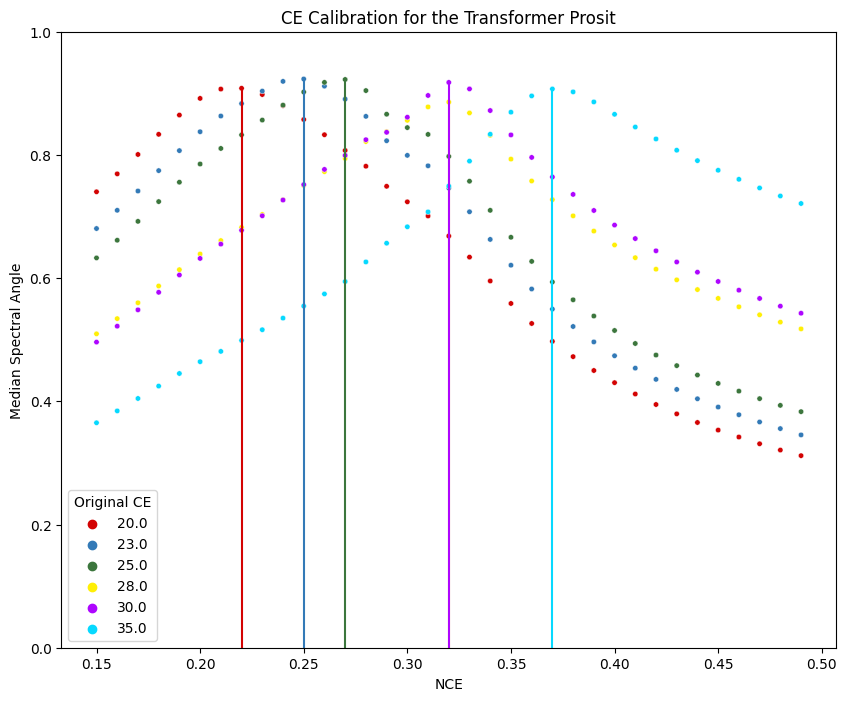

In [19]:
ce_calibration.plot_ce_calibration(transformer_ce_cal, color_palette=["#d30303", "#337ab7", "#3c763d", "#ffef06", "#ae06ff", "#06d9ff"], title="CE Calibration for the Transformer Prosit")

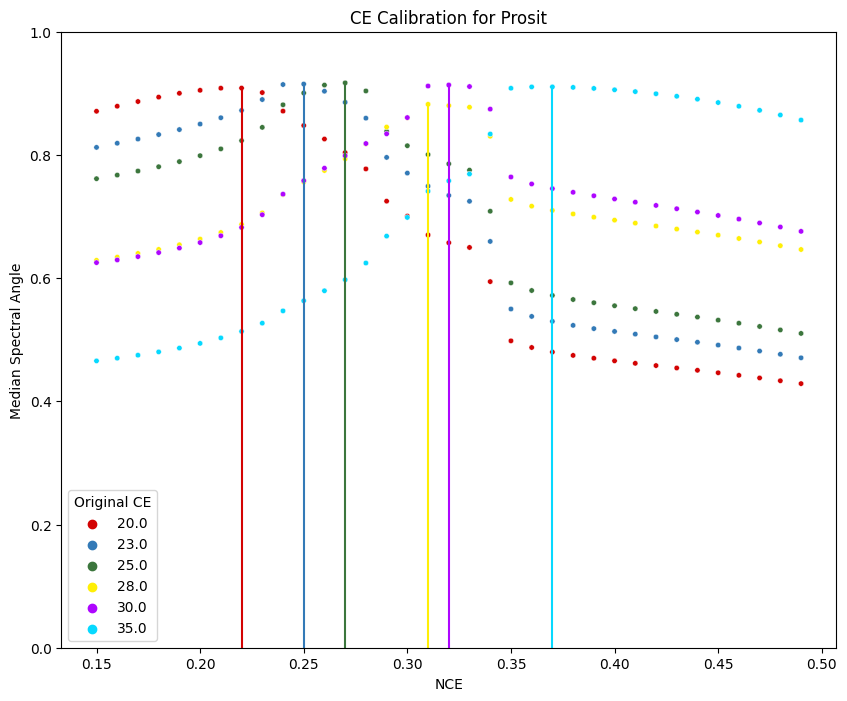

In [20]:
ce_calibration.plot_ce_calibration(baseline_ce_cal, color_palette=["#d30303", "#337ab7", "#3c763d", "#ffef06", "#ae06ff", "#06d9ff"], title="CE Calibration for Prosit")